# Линейная алгебра. Лабораторная работа 1, осень 2024


## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [3]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется по умолчанию *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://numpy.org/doc/stable/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать, аналогичных slicing для списков базового Python, но отчасти расширяющих их (при желании см. [документацию](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing)):
- элемент с номером `(i,j)`: `A[i,j]`; <small>*работает и `A[i][j]`, но менее эффективно (создаётся промежуточный одномерный массив `A[i]`, прежде чем взять из него j-й элемент)*</small>
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

Обратите внимание, что эти методы как правило возвращают view, а не copy (<small>*есть исключения, при желании см. [advanced-indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)*</small>), то есть если, например, изменить что-то в `A[i, :]`, то изменится исходная матрица `A`.

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. <small>*Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`. Не путать с `sla.expm(A)` – настоящей матричной экспонентой.*</small>

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.25 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте нулевую матрицу $Y$ размера $4\times1$ и найдите произведение $ZY$;

- создайте диагональную матрицу $D$ размера $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след $\operatorname{tr}(D)$ (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу $D^{-1}$;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте выводить результаты.

In [5]:
# создайте нулевую матрицу  𝑍  размера  3×4 ;
z = np.zeros([3,4]) 
z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
# создайте нулевую матрицу  𝑌  размера  4×1 найдите произведение;
y = np.zeros([4,1])
y

array([[0.],
       [0.],
       [0.],
       [0.]])

In [7]:
# найдите произведение  𝑍𝑌 
result = np.dot(z, y)
result

array([[0.],
       [0.],
       [0.]])

In [11]:
# создайте диагональную матрицу  𝐷  размера  5×5  с диагональными элементами 1, 2, 3, 4 и 5;
d = np.diag([1, 2, 3, 4, 5])
d

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [13]:
# найдите её след  tr(𝐷) 
tr = np.trace(d)
tr

15

In [15]:
# найдите обратную к ней матрицу  𝐷−1
np.linalg.inv(d)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

In [19]:
# сгенерируйте случайную матрицу  𝑋  размера  4×5 ;
x = np.random.rand(4, 5)
x

array([[0.04395037, 0.7827588 , 0.09150452, 0.96908453, 0.572011  ],
       [0.55777925, 0.08470948, 0.21916942, 0.14300339, 0.73461895],
       [0.18759886, 0.99749806, 0.85945628, 0.23132406, 0.89146603],
       [0.26794285, 0.44176605, 0.42670384, 0.07312981, 0.02399112]])

In [20]:
# найдите определитель подматрицы матрицы  𝑋 , расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; 
# считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). 
# Такой определитель называется минором матрицы  𝑋 ;

sub_matrix = x[1:3, 0:2]
sub_matrix

array([[0.55777925, 0.08470948],
       [0.18759886, 0.99749806]])

In [21]:
minor = np.linalg.det(sub_matrix)
minor

0.5404923184322944

In [22]:
# найдите произведение  𝑋𝑇𝑋 
result = np.dot(np.transpose(x), x)
result

array([[0.42003603, 0.38714928, 0.40183507, 0.18534669, 0.60856156],
       [0.38714928, 1.81004667, 1.13600095, 1.03372476, 1.40980994],
       [0.40183507, 1.13600095, 0.97714958, 0.35003528, 0.98976078],
       [0.18534669, 1.03372476, 0.35003528, 1.01843358, 0.86735202],
       [0.60856156, 1.40980994, 0.98976078, 0.86735202, 1.66214884]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете. Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками.

**Задание 2.1 [0.1 балла]**
Для разминки реализуйте одно элементарное преобразование: прибавьте третью строку данной матрицы ко второй с коэффициентом 3. Не используйте циклов; для естественного решения достаточно одной строки.

In [23]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)

A[1] += 3 * A[2]

print(A)

[[ 1.  2.  3.]
 [25. 29. 33.]
 [ 7.  8.  9.]]


**Задание 2.2 [0.2 балла]** Теперь напишите функцию, принимающую на вход матрицу и находящую номер первого слева ненулевого столбца. Предусмотрите случай, что на вход подана нулевая матрица (например, удобно вывести ответ «-1» в таком случае).

In [4]:
def find_first_nonzero_column (A):
    
    if np.all(A == 0): # проверка на случай нулевой матрицы 
        return -1
    
    for k in range(A.shape[1]): # проходимся по столбцам матрицы
        if np.any(A[:, k] != 0):  # если есть ненулевой эменет - возвращаем индекс столбца
            return k  

In [27]:
# Test cases
A1 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A1: {find_first_nonzero_column(A1)}")  # Expected output: 2

A2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A2: {find_first_nonzero_column(A2)}")  # Expected output: -1

A3 = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A3: {find_first_nonzero_column(A3)}")  # Expected output: 1

A4 = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"First non-zero column of A4: {find_first_nonzero_column(A4)}")  # Expected output: 0

A5 = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"First non-zero column of A5: {find_first_nonzero_column(A5)}") # Expected output: 0

First non-zero column of A1: 2
First non-zero column of A2: -1
First non-zero column of A3: 1
First non-zero column of A4: 0
First non-zero column of A5: 0


**Задание 2.3 [0.3 балла]** Теперь напишите функцию, меняющую при необходимости строки матрицы местами так, чтобы в первом ненулевом столбце на первом месте было ненулевое число. Функция должна изменять исходную матрицу и возвращать число $\pm 1$ в зависимости от того, был ли произведен обмен строк местами.

In [5]:
def swap_rows_if_needed (A):
   
    k = find_first_nonzero_column(A)
    if k == -1:  # если матрица нулевая (для нее было -1), возвращаем 1
        return 1
    
    # находим первую строку с ненулевым элементом в столбце k
    for i in range(A.shape[0]):
        if A[i, k] != 0: # добавляем проверку на позицию нулевого символа
            if i == 0:
                return 1
            else: 
                A[[0, i]] = A[[i, 0]] # изменение мест 
                return -1

In [6]:
# Test cases
A1 = np.array([[0, 0, 1], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A1:\n{A1}")
print(f"swap_rows_if_needed(A1): {swap_rows_if_needed(A1)}") # Expected output: 1
print(f"Modified A1:\n{A1}")

A2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A2:\n{A2}")
print(f"swap_rows_if_needed(A2): {swap_rows_if_needed(A2)}") # Expected output: 1
print(f"Modified A2:\n{A2}")

A3 = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A3:\n{A3}")
print(f"swap_rows_if_needed(A3): {swap_rows_if_needed(A3)}") # Expected output: 1
print(f"Modified A3:\n{A3}")

A4 = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.float64)
print(f"Original A4:\n{A4}")
print(f"swap_rows_if_needed(A4): {swap_rows_if_needed(A4)}") # Expected output: -1
print(f"Modified A4:\n{A4}")

A5 = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"Original A5:\n{A5}")
print(f"swap_rows_if_needed(A5): {swap_rows_if_needed(A5)}") # Expected output: 1
print(f"Modified A5:\n{A5}")

A6 = np.array([[0,2,3],[4,5,6],[7,8,9]], dtype=np.float64)
print(f"Original A6:\n{A6}")
print(f"swap_rows_if_needed(A6): {swap_rows_if_needed(A6)}") # Expected output: -1
print(f"Modified A6:\n{A6}")

print(f"Original slice:\n{A6[1:,1:]}")
print(f"swap_rows_if_needed(A6): {swap_rows_if_needed(A6[1:,1:])}") # Expected output: 1
print(f"Modified slice:\n{A6[1:,1:]}")

Original A1:
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A1): 1
Modified A1:
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A2:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A2): 1
Modified A2:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A3:
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A3): 1
Modified A3:
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A4:
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
swap_rows_if_needed(A4): -1
Modified A4:
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Original A5:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
swap_rows_if_needed(A5): 1
Modified A5:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Original A6:
[[0. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
swap_rows_if_needed(A6): -1
Modified A6:
[[4. 5. 6.]
 [0. 2. 3.]
 [7. 8. 9.]]
Original slice:
[[2. 3.]
 [8. 9.]]
swap_rows_if_needed(A6): 1
Modified slice:
[[2. 3.]
 [8. 9.]]


**Задание 2.4 [0.4 балла]** Теперь напишите функцию, принимающую на вход матрицу и номер строки $j$, и вычитающую первую строку из $j$-й с некоторым коэффициентом так, чтобы первый ненулевой элемент строки $j$ занулился. Функция должна изменять данную матрицу. Предполагайте данным, что в первой строке содержится в нужном столбце ненулевой элемент.

In [15]:
def simplify_row (A, j):
    
    first_col = np.argmax(A[0] != 0) 
    coeff = A[j, first_col] / A[0, first_col] 
    A[j] -= coeff * A[0] #
    
    return A

In [16]:
# Test cases
A1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A1, 1)
print(A1)  # Expected output: [[1,2,3],[0,-3,-6],[7,8,9]]

A2 = np.array([[1, 0, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A2, 1)
print(A2)  # Expected output: [[1,0,3],[0,5,-6],[7,8,9]]

A3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)
simplify_row(A3, 2)
print(A3)  # Expected output: [[1,2,3],[4,5,6],[0,-6,-12]]

A4 = np.array([[1, 2, 3], [1, 2, 3], [7, 8, 9]], dtype=np.float64)
simplify_row(A4, 1)
print(A4) # Expected output: [[1,2,3],[0,0,0],[7,8,9]]

A5 = np.array([[0, 2, 3], [0, 5, 6], [0, 8, 9]], dtype=np.float64)
simplify_row(A5, 1)
print(A5) # Expected output: [[0,2,3],[0,0,-1.5],[0,8,9]]

[[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 7.  8.  9.]]
[[ 1.  0.  3.]
 [ 0.  5. -6.]
 [ 7.  8.  9.]]
[[  1.   2.   3.]
 [  4.   5.   6.]
 [  0.  -6. -12.]]
[[1. 2. 3.]
 [0. 0. 0.]
 [7. 8. 9.]]
[[ 0.   2.   3. ]
 [ 0.   0.  -1.5]
 [ 0.   8.   9. ]]


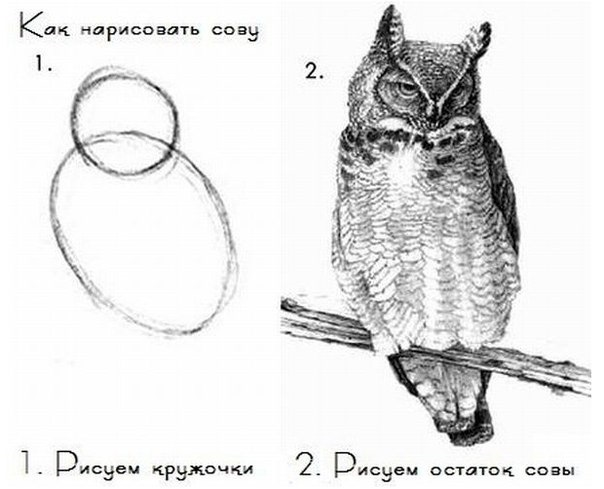

**Задание 2.5 [1 балл]**
Теперь реализуйте функцию `my_det`, вычисляющую определитель. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной. Функция не должна быть деструктивной – исходная матрица не должна измениться.

In [14]:
def my_det(X):
    
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    
    # проверка на квадратность
    if X.shape[0] != X.shape[1]:
        raise ValueError("не квадратная матрица :(")
    
    # для матрицы 1х1
    if X.shape[0] == 1:
        return X[0, 0]
    
    # для матрицы 2х2
    if X.shape[0] == 2:
        return X[0, 0] * X[1, 1] - X[0, 1] * X[1, 0]
    
    det = 0
    # раскладываем по первому ряду 
    for col in range(X.shape[1]):
        # создаем минор (в виде матрицы) с помощью срезов
        minor = np.vstack([np.delete(X[i, :], col) for i in range(1, X.shape[0])])
        det += ((-1) ** col) * X[0, col] * my_det(minor)
        
    return det

Простая проверка:

In [15]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]], dtype=np.float64)
print(my_det(X))

-1.0


In [16]:
sla.det(X)

-1.0

In [17]:
A = np.array([[1, -1, 1, -2], 
              [1, 3, -1, 3], 
              [-1, -1, 4, 3], 
              [-3, 0, -8, -13]])
print(my_det(A))
print(sla.det(A))

-153
-153.00000000000003


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [23]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print(X)
        print(my_det(X))
        print(sla.det(X))
        print('FAILED')
        
# уменьшила размеры матриц, иначе очень-очень долго грузилась ячейка

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

<small>Обратите внимание на способ сравнения: проверка на точное равенство не подходит из-за машинной точности; см. следующее задание.</small>

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. <small>Вопрос для размышления: зачем запускать много раз, если рассматривать только три из этих запусков?..</small> Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

14.7 µs ± 434 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.78 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.1 µs ± 393 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
81.1 ms ± 3.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
15.8 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.88 s ± 162 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


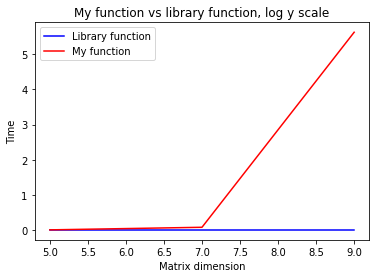

In [28]:
# Запустите этот блок кода
lib_times = []
my_times = []
# dimensions = [10, 100, 1000]
dimensions = [5, 7, 9] # я не очень терпеливая...
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

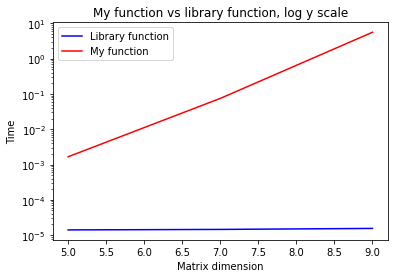

In [29]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [1 балл]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [71]:
matrix1_int = np.array([
    [1, 0],
    [10**20, 1]
])
matrix2_int = np.array([
    [10**-20, 1],
    [0, 1 - 10**20]
])

# Умножение матриц с целыми числами
result_int = np.dot(matrix1_int, matrix2_int)

# Матрицы с числами с плавающей точкой
matrix1_float = np.array([
    [1.0, 0.0],
    [10.0**20, 1.0]
])
matrix2_float = np.array([
    [10.0**-20, 1.0],
    [0.0, 1.0 - 10.0**20]
])

# Умножение матриц с числами с плавающей точкой
result_float = np.dot(matrix1_float, matrix2_float)

# Вывод результатов
print("Результат умножения матриц с целыми числами:")
print(result_int)

print("\nРезультат умножения матриц с числами с плавающей точкой:")
print(result_float)

Результат умножения матриц с целыми числами:
[[1e-20 1]
 [1.0 1]]

Результат умножения матриц с числами с плавающей точкой:
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**правильный - после умножения с целыми числами**

**Задание 3.2 [1 балл]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [76]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    
    for i in range(dim):
        for j in range(dim):
            if j == 0 or i == 0:
                P[i][j] = 1
            else:
                P[i][j] = P[i - 1][j] + P[i][j - 1]
    return P

Можно показать теоретической выкладкой, что её определитель всегда равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [79]:
pascal = my_pascal(30)
sla.det(pascal)

5.441028706023281e+48

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в numpy лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [1 балл]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [80]:
def prod_and_sq_sum(A):
    diag = np.diag(A)
    prod_diag = np.prod(diag) # перемножение элементов в массиве
    sq_sum = np.sum(diag**2)
    
    return prod_diag, sq_sum

In [82]:
matrix = np.array([[2, 0, 0],[0, 3, 0],[0, 0, 4]])

prod, sq_sum = prod_and_sq_sum(matrix)
print("Произведение:", prod)
print("Сумма квадратов:", sq_sum)

Произведение: 24
Сумма квадратов: 29


**Задание 4.2 [1.5 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [81]:
def f(A, B, lambd, k): # должна вычислять сумму: лямба * столбец матрицы А * транспонированный столбец матрицы B
    
    A_cols = A[:, :k]  # получаем столбцы матрицы A
    B_cols = B[:, :k]  # получаем Столбцы матрицы B

    B_cols_T = B_cols.T  # транспонированные столбцы B
    
    dot_products = np.sum(A_cols * B_cols_T, axis=0) # умножаем A на В

    result = np.sum(lambd[:k] * dot_products) # умножаем на лямбду и суммируем
    return result

**Задание 4.3 [1.5 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [83]:
def get_diag(A, B):
    result = np.sum(A * B.T, axis=1)
    return result

In [84]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
B = np.array([
    [9, 8, 7],
    [6, 5, 4],
    [3, 2, 1]
])

res = np.dot(A, B)
print(res)

func = get_diag(A,B)
print(func)

[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[30 69 90]


## Часть 5 (бонус). Метод Гаусса или обратные матрицы?

**Задание 5.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

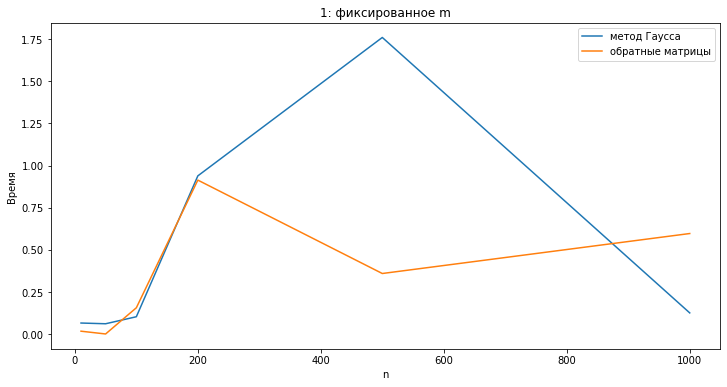

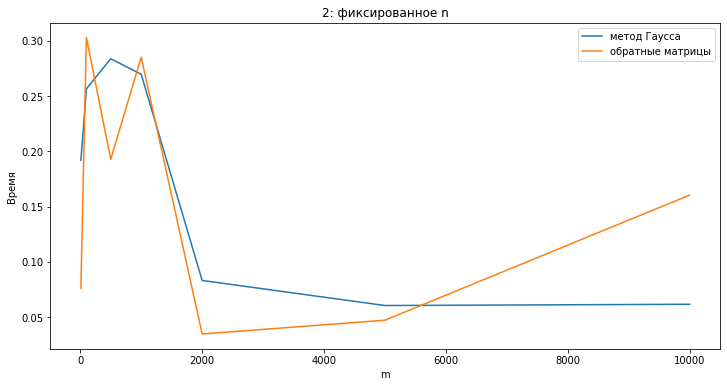

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt


def gauss_solve(A, B): # метод Гаусса
    return np.linalg.solve(A, B)

def inverse_multiply(A, B): # умножение на обратную матрицу
    A_inv = np.linalg.inv(A)
    return A_inv @ B

# 1: фиксированное m
m_fixed = 10
n_values_1 = [10, 50, 100, 200, 500, 1000]
gauss_times_1 = []
inverse_times_1 = []

for n in n_values_1:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m_fixed)
    
    start = time.time()
    gauss_solve(A, B)
    gauss_times_1.append(time.time() - start)
    
    start = time.time()
    inverse_multiply(A, B)
    inverse_times_1.append(time.time() - start)

# 2: фиксированное n
n_fixed = 100
m_values_2 = [10, 100, 500, 1000, 2000, 5000, 10000]
gauss_times_2 = []
inverse_times_2 = []

for m in m_values_2:
    A = np.random.rand(n_fixed, n_fixed)
    B = np.random.rand(n_fixed, m)
    
    start = time.time()
    gauss_solve(A, B)
    gauss_times_2.append(time.time() - start)
    
    start = time.time()
    inverse_multiply(A, B)
    inverse_times_2.append(time.time() - start)

# графики
plt.figure(figsize=(12, 6))
plt.plot(n_values_1, gauss_times_1, label='метод Гаусса')
plt.plot(n_values_1, inverse_times_1, label='обратные матрицы')
plt.xlabel('n')
plt.ylabel('Время')
plt.title('1: фиксированное m')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(m_values_2, gauss_times_2, label='метод Гаусса')
plt.plot(m_values_2, inverse_times_2, label='обратные матрицы')
plt.xlabel('m')
plt.ylabel('Время')
plt.title('2: фиксированное n')
plt.legend()
plt.show()